In [ ]:
import matplotlib.pyplot as plt
import pandas as pd
import statsmodels.api as sm
from statsmodels.tsa.arima.model import ARIMA

co2 = sm.datasets.co2.load_pandas().data

In [2]:
co2.info()
co2

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 2284 entries, 1958-03-29 to 2001-12-29
Freq: W-SAT
Data columns (total 1 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   co2     2225 non-null   float64
dtypes: float64(1)
memory usage: 35.7 KB


,co2
1958-03-29,316.1
1958-04-05,317.3
1958-04-12,317.6
1958-04-19,317.5
1958-04-26,316.4
...,...
2001-12-01,370.3
2001-12-08,370.8
2001-12-15,371.2
2001-12-22,371.3


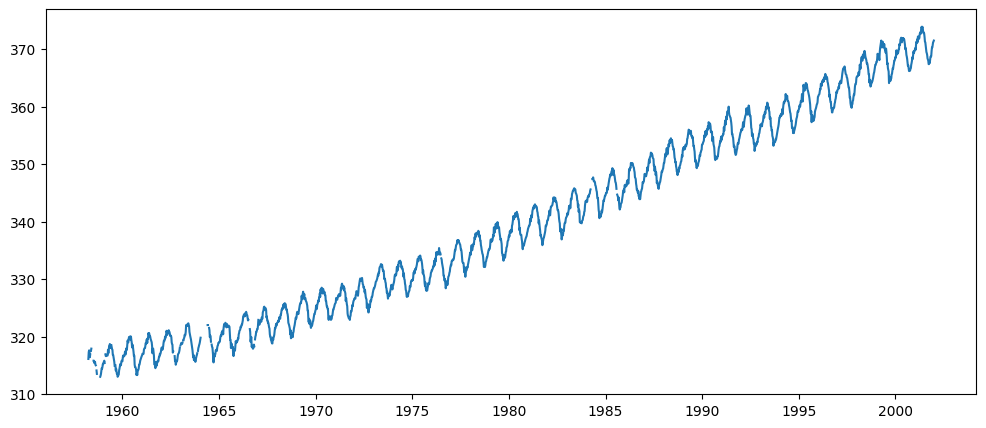

In [3]:
fig, ax = plt.subplots(figsize=(12, 5))
ax.plot(co2)

## Rolling average

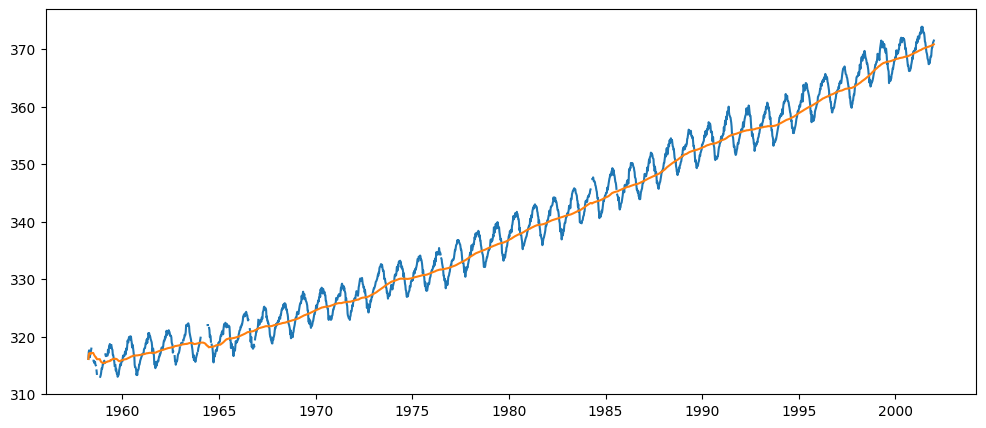

In [4]:
trend = co2.rolling("365d").mean()

fig, ax = plt.subplots(figsize=(12, 5))
ax.plot(co2)
ax.plot(trend)

## Seasonaility

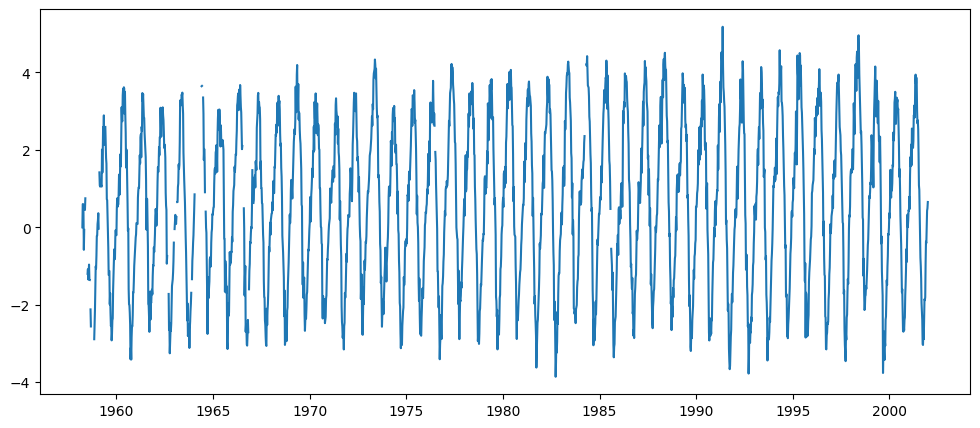

In [144]:
fig, ax = plt.subplots(figsize=(12, 5))
ax.plot(co2 - trend)

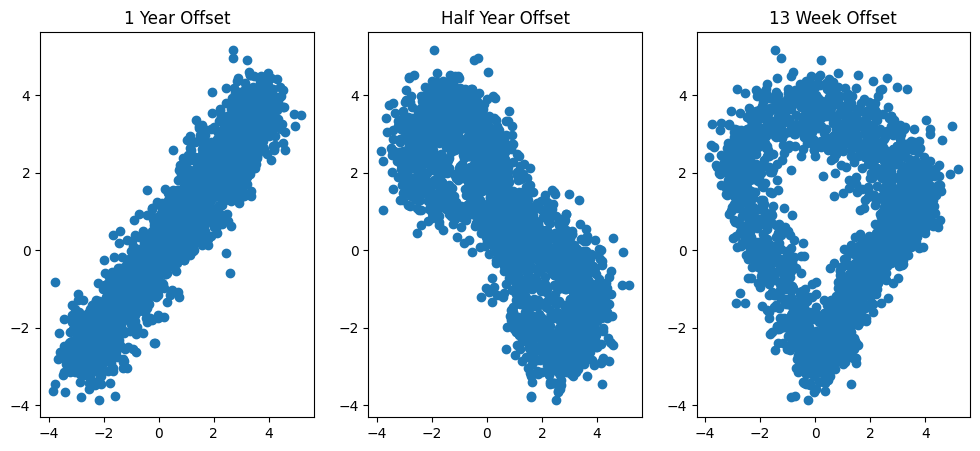

In [6]:
fig, (ax1, ax2, ax3) = plt.subplots(1, 3, figsize=(12, 5))

df = pd.merge(notrend, notrend.shift(freq="364D"), left_index=True, right_index=True)
ax1.set_title("1 Year Offset")
ax1.scatter(df["co2_x"], df["co2_y"])

df = pd.merge(notrend, notrend.shift(freq="182D"), left_index=True, right_index=True)
ax2.set_title("Half Year Offset")
ax2.scatter(df["co2_x"], df["co2_y"])

df = pd.merge(notrend, notrend.shift(freq="91D"), left_index=True, right_index=True)
ax3.set_title("13 Week Offset")
ax3.scatter(df["co2_x"], df["co2_y"])


## Achieving stationarity via differencing

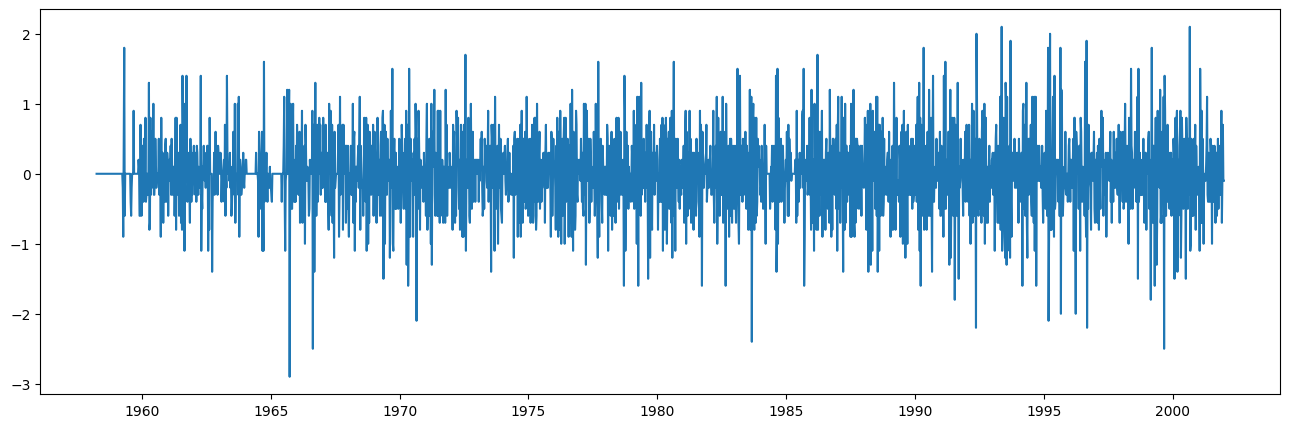

In [145]:
co2 = sm.datasets.co2.load_pandas().data

seasonaldiff = co2.diff(52)  # subtract out seasonal component
diff = seasonaldiff.diff()  # subtract out first order component
diff[diff.isna()] = 0

fig, ax = plt.subplots(figsize=(16, 5))
ax.plot(diff)

# Fitting an ARIMA model

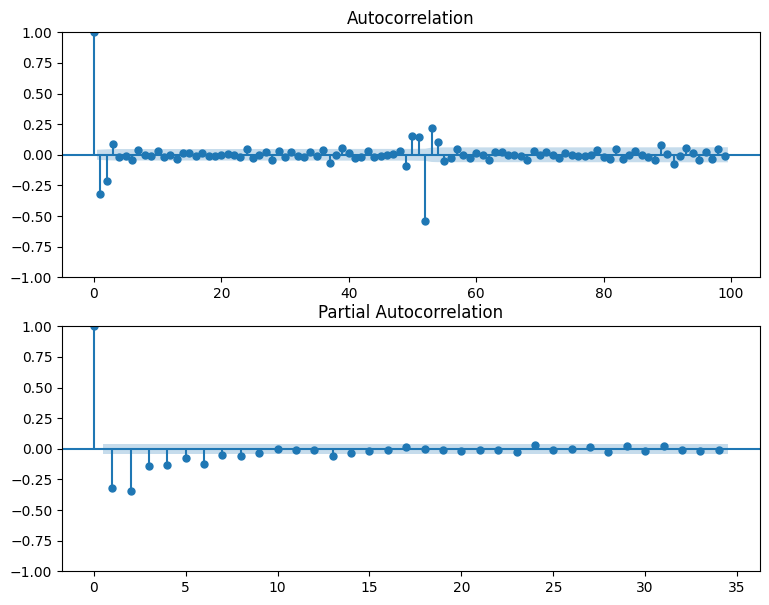

In [146]:
fig, (ax1, ax2) = plt.subplots(2, 1, figsize=(9, 7))
sm.graphics.tsa.plot_acf(diff, lags=np.arange(0, 100, 1), ax=ax1)
sm.graphics.tsa.plot_pacf(diff, ax=ax2);

(310.0, 380.0)

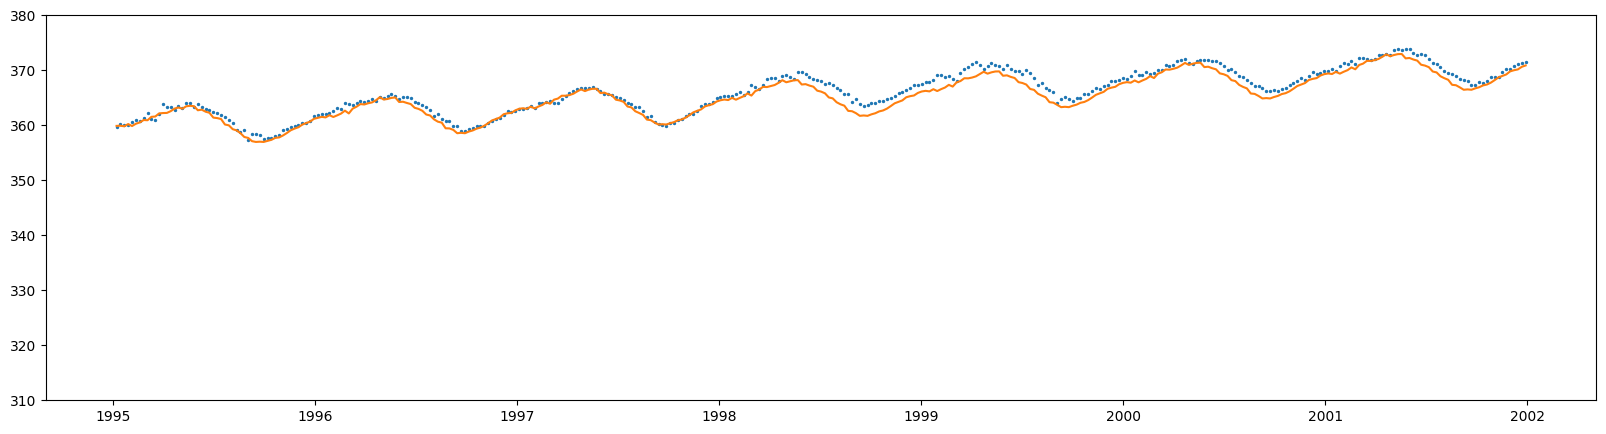

In [147]:
training = co2[:"1995/1/1"]
test = co2["1995/1/1":]

model = ARIMA(training, order=(1, 1, 0), seasonal_order=(1, 1, 0, 52)).fit()

fig, ax = plt.subplots(figsize=(20, 5))
ax.scatter(test.index, test, s=2)

ax.plot(model.forecast(len(test)), color="tab:orange")
ax.set_ylim(310, 380)